In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'x':[0.1, 1.3, 2, 2.9, 3.6, 5.1], 'y':[0, 0, 1,0, 1, 1]})

<Axes: xlabel='x', ylabel='y'>

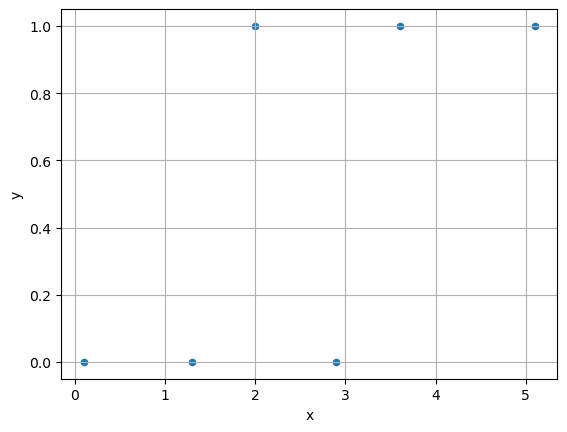

In [3]:
df.plot(x='x', y='y', kind='scatter', grid=True)

In [4]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.grid(True)
    plt.plot(x, m * x + b)
    plt.scatter(df['x'], df['y'])
    plt.ylim(-1, 1.1)
    plt.xlim(-1, 6)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [5]:
m, b = 0,0

## Пробуем через линейную регрессию

In [42]:
n = 100
learning_rate = 0.01
df['y_pred'] = m * df['x'] + b

for _ in range(n):
    df['err'] = (df['y'] - df['y_pred'])**2
    print(df['err'].mean())
   
    df['m_change'] = (df['y'] - df['y_pred']) * df['x']
    df['b_change'] = -(df['y'] - df['y_pred'])

    m += learning_rate * df['m_change'].mean()
    b += learning_rate * df['b_change'].mean()

    df['y_pred'] = m * df['x'] + b
   
    if df['err'].mean() < ((df['y'] - df['y_pred'])**2).mean():
        m -= learning_rate * df['m_change'].mean()
        b -= learning_rate * df['b_change'].mean()
        break


2.0772299600387405
2.0472078406705974
2.0236293602458937
2.0054963594841424
1.9919670892840495
1.9823317129898763
1.975991645687051
1.9724421295415582
1.9712575383286763


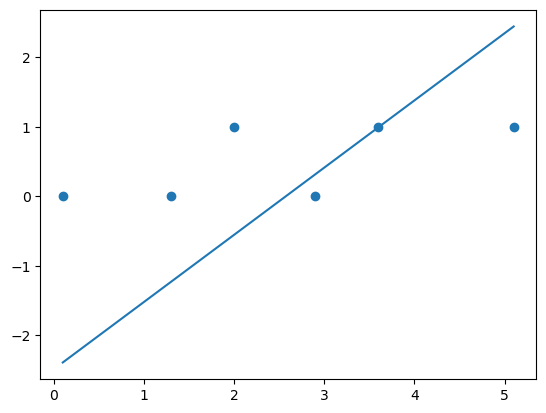

In [43]:
plt.plot(df['x'], m * df['x'] + b)
plt.scatter(df['x'], df['y'])

In [44]:
df

,x,y,y_pred,err,m_change,b_change,lr_pred,l
0,0.1,0,-2.396764,5.714557,0.239051,-2.390514,0.137047,-0.091387
1,1.3,0,-1.242972,1.513094,1.599102,-1.230079,0.286562,-0.288253
2,2.0,1,-0.569927,2.412300,3.106316,-1.553158,0.408331,-0.893388
3,2.9,0,0.295417,0.100596,-0.919788,0.317168,0.580555,-1.018679
4,3.6,1,0.968462,0.000035,0.021281,-0.005911,0.703981,-0.240998
5,5.1,1,2.410702,2.086964,-7.367627,1.444633,0.883520,-0.055532


In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(df['y'], df['y_pred'])

In [47]:
df

,x,y,y_pred,err,m_change,b_change,lr_pred,l
0,0.1,0,-2.396764,5.714557,0.239051,-2.390514,0.137047,-0.091387
1,1.3,0,-1.242972,1.513094,1.599102,-1.230079,0.286562,-0.288253
2,2.0,1,-0.569927,2.412300,3.106316,-1.553158,0.408331,-0.893388
3,2.9,0,0.295417,0.100596,-0.919788,0.317168,0.580555,-1.018679
4,3.6,1,0.968462,0.000035,0.021281,-0.005911,0.703981,-0.240998
5,5.1,1,2.410702,2.086964,-7.367627,1.444633,0.883520,-0.055532


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(df[['x']], df['y'])

LogisticRegression()

In [51]:
df['lr_pred'] = lr.predict_proba(df[['x']])[:,1]

In [52]:
df

,x,y,y_pred,err,m_change,b_change,lr_pred,l
0,0.1,0,-2.396764,5.714557,0.239051,-2.390514,0.137047,-0.091387
1,1.3,0,-1.242972,1.513094,1.599102,-1.230079,0.286562,-0.288253
2,2.0,1,-0.569927,2.412300,3.106316,-1.553158,0.408331,-0.893388
3,2.9,0,0.295417,0.100596,-0.919788,0.317168,0.580555,-1.018679
4,3.6,1,0.968462,0.000035,0.021281,-0.005911,0.703981,-0.240998
5,5.1,1,2.410702,2.086964,-7.367627,1.444633,0.883520,-0.055532


In [53]:
roc_auc_score(df['y'], df['lr_pred'])

In [54]:
df[['x', 'y', 'y_pred', 'lr_pred']]

,x,y,y_pred,lr_pred
0,0.1,0,-2.396764,0.137047
1,1.3,0,-1.242972,0.286562
2,2.0,1,-0.569927,0.408331
3,2.9,0,0.295417,0.580555
4,3.6,1,0.968462,0.703981
5,5.1,1,2.410702,0.883520


In [55]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.grid(True)
    plt.plot(x, 1 / (1 + np.exp(-(m * x + b))))
    plt.scatter(df['x'], df['y'])
    plt.ylim(-1, 1.1)
    plt.xlim(-1, 6)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [56]:
from sympy import *

In [57]:
x_ = Symbol('x', real=True)
y_ = Symbol('y', real=True)
m_ = Symbol('m', real=True)
b_ = Symbol('b', real=True)

In [58]:
e = Pow(y_ - 1/(1 + exp(-m_*x_ - b_)),2)

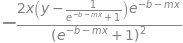

In [59]:
diff(e, m_)

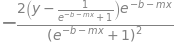

In [60]:
diff(e, b_)

In [61]:
init_printing(use_latex=True)

In [62]:
str(diff(e, m_))

'-2*x*(y - 1/(exp(-b - m*x) + 1))*exp(-b - m*x)/(exp(-b - m*x) + 1)**2'

In [63]:
str(diff(e, b_))

'-2*(y - 1/(exp(-b - m*x) + 1))*exp(-b - m*x)/(exp(-b - m*x) + 1)**2'

In [64]:
df = df[['x', 'y']].copy()
m, b = 1,1
n = 500
learning_rate = 0.01
df['y_pred'] = 1 / (1 + np.exp(-(m * df['x'] + b)))

for i in range(n):
    df['err'] = (df['y'] - df['y_pred'])**2

    if not i % 100:
        print(df['err'].mean())
   
    df['m_change'] = 2*df['x']*(df['y'] - 1/(np.exp(-b - m*df['x']) + 1))*np.exp(-b - m*df['x'])/(np.exp(-b - m*df['x']) + 1)**2
    df['b_change'] = 2*(df['y'] - 1/(np.exp(-b - m*df['x']) + 1))*np.exp(-b - m*df['x'])/(np.exp(-b - m*df['x']) + 1)**2

    m += learning_rate * df['m_change'].mean()
    b += learning_rate * df['b_change'].mean()

    df['y_pred'] = 1 / (1 + np.exp(-(m * df['x'] + b)))
   
    if df['err'].mean() < ((df['y'] - df['y_pred'])**2).mean():
        m -= learning_rate * df['m_change'].mean()
        b -= learning_rate * df['b_change'].mean()
        break


0.39200233067975393
0.3822236125995122
0.3704113020289593
0.3558256958806087
0.33742032774382585


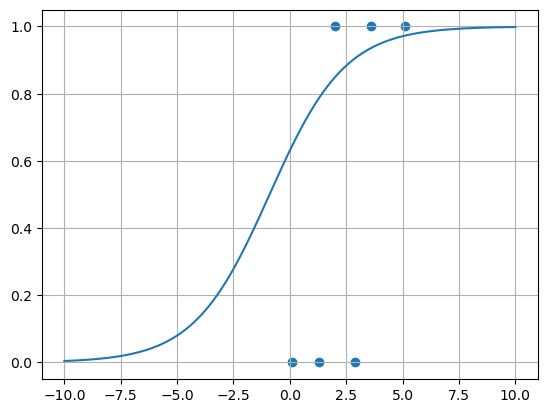

In [65]:
x = np.linspace(-10, 10, num=1000)
plt.grid(True)
plt.plot(x, 1 / (1 + np.exp(-(m * x + b))))
plt.scatter(df['x'], df['y'])

In [66]:
df

,x,y,y_pred,err,m_change,b_change
0,0.1,0,0.644681,0.415976,-0.029537,-0.295375
1,1.3,0,0.787555,0.620939,-0.342267,-0.263282
2,2.0,1,0.849035,0.022657,0.076986,0.038493
3,2.9,0,0.905760,0.821100,-0.446969,-0.154127
4,3.6,1,0.935820,0.004078,0.027487,0.007635
5,5.1,1,0.972692,0.000735,0.007299,0.001431


In [67]:
lr = LogisticRegression()

In [68]:
lr.fit(df[['x']], df['y'])

LogisticRegression()

In [69]:
df['lr_pred'] = lr.predict_proba(df[['x']])[:,1]

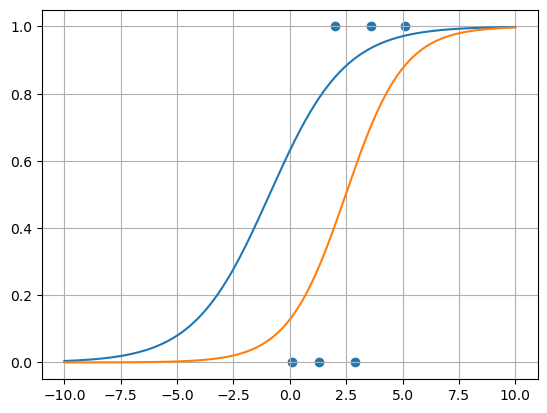

In [70]:
x = np.linspace(-10, 10, num=1000)
plt.grid(True)
plt.plot(x, 1 / (1 + np.exp(-(m * x + b))))
plt.scatter(df['x'], df['y'])
plt.plot(x, 1 / (1 + np.exp(-(0.77324788 * x + -1.91736519))))


In [71]:
lr.coef_

array([[0.77324788]])

In [72]:
lr.intercept_

array([-1.91736519])

In [73]:
roc_auc_score(df['y'], df['y_pred'])

In [74]:
roc_auc_score(df['y'], df['lr_pred'])

In [75]:
# df = df[['x', 'y']].copy()
m, b = 1,1
n = 500
learning_rate = 0.1
df['y_pred'] = 1 / (1 + np.exp(-(m * df['x'] + b)))

for i in range(n):
    df['err'] = df['y'] - df['y_pred']

    if not i % 100:
        print(df['err'].mean())
   
    df['m_change'] = df['x']*df['err']
    df['b_change'] = df['err']

    m += learning_rate * df['m_change'].mean()
    b += learning_rate * df['b_change'].mean()

    df['y_pred'] = 1 / (1 + np.exp(-(m * df['x'] + b)))
   
    # if df['err'].mean() < (df['y'] - df['y_pred']).mean():
    #     m -= df['m_change'].mean()
    #     b -= df['b_change'].mean()
    #     break
    
    df['l'] = df['y'] * np.log(df['y_pred']) + (1 - df['y']) * np.log(1 - df['y_pred'])
    print(df['l'].mean())


-0.42994688588007274
-1.2324561900423958
-1.1729768800293485
-1.1158375326986196
-1.061389661122918
-1.0100113392604009
-0.9620922954482246
-0.9180102625290522
-0.8780982506584558
-0.8426049924361464
-0.8116544305307519
-0.7852135467999753
-0.7630789018078139
-0.7448889962986659
-0.7301621148642194
-0.7183508370600572
-0.7088994158360767
-0.7012912118378302
-0.6950789957319082
-0.6898975286236256
-0.6854623498830265
-0.6815602459161861
-0.6780362394424296
-0.6747803944175859
-0.6717162007937508
-0.6687911889265886
-0.6659697691244388
-0.6632279868444201
-0.6605497938674102
-0.6579244556132795
-0.6553447785082527
-0.652805913476063
-0.6503045562031969
-0.6478384166170198
-0.6454058689774402
-0.6430057221061838
-0.6406370690066673
-0.6382991886876573
-0.6359914821854148
-0.6337134309266512
-0.6314645696563554
-0.6292444688474175
-0.6270527232770509
-0.6248889446116863
-0.622752756596681
-0.6206437919386113
-0.6185616902874825
-0.6165060969338172
-0.6144766619704106
-0.6124730397560779
-0

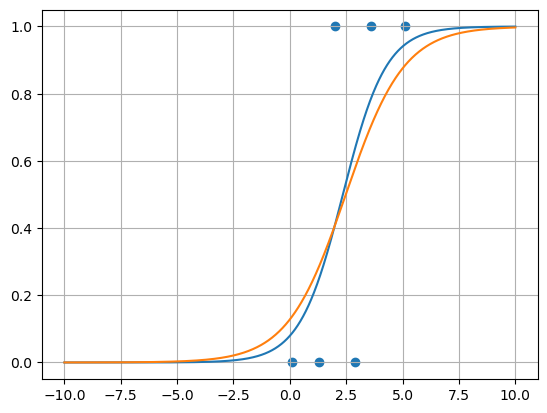

In [76]:
x = np.linspace(-10, 10, num=1000)
plt.grid(True)
plt.plot(x, 1 / (1 + np.exp(-(m * x + b))))
plt.scatter(df['x'], df['y'])
plt.plot(x, 1 / (1 + np.exp(-(0.77324788 * x + -1.91736519))))
